# Import Dependencies

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import my_functions as mf

# Importing Image

In [4]:
img = cv2.imread('../data/images/chessboard/chessboard_captured_image.png')

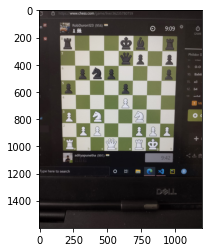

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
mf.show_my_small_image(img)

# Apply adaptive threshold

In [7]:
def pre_process(img):
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # CONVERT IMAGE TO GRAY SCALE
    imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1)  # ADD GAUSSIAN BLUR
    imgThreshold = cv2.adaptiveThreshold(imgBlur, 255, 1, 1, 11, 2)  # APPLY ADAPTIVE THRESHOLD
    return imgThreshold

In [8]:
pre_processed_img = pre_process(img)

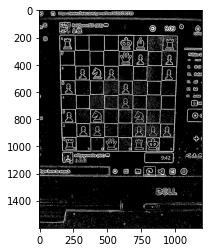

In [10]:
plt.imshow(pre_processed_img, cmap='gray')

In [11]:
mf.show_my_small_image(pre_processed_img)

# Finding Contours

In [12]:
img_contours = img.copy()

In [13]:
contours, hierarchy = cv2.findContours(pre_processed_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)
print()

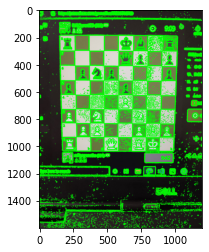

In [15]:
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))

In [17]:
mf.show_my_small_image(img_contours)

# Find Biggest Contour

In [18]:
biggest, max_area = mf.biggest_contour(contours)

In [19]:
biggest

array([[[ 154,  183]],

       [[ 175, 1037]],

       [[ 988, 1039]],

       [[1015,  190]]], dtype=int32)

These are the corners of the chess board

In [20]:
biggest = mf.reorder(biggest)

# Perspective Wrapping

In [40]:
heightImg = 800
widthImg = 800

In [41]:
img_big_contour = img.copy()

In [43]:
if biggest.size != 0:
    biggest = mf.reorder(biggest)
    cv2.drawContours(img_big_contour, biggest, -1, (0, 0, 255), 25) # DRAW THE BIGGEST CONTOUR
    pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2) # GER
    img_warp_colored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))
    img_warp_colored = cv2.cvtColor(img_warp_colored,cv2.COLOR_BGR2GRAY)

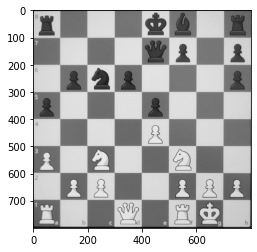

In [45]:
plt.imshow(img_warp_colored,cmap = 'gray')

In [46]:
mf.show_my_small_image(img_warp_colored)

In [48]:
rows = np.vsplit(img_warp_colored,8)
boxes=[]
for r in rows:
    cols= np.hsplit(r,8)
    for box in cols:
        boxes.append(box)

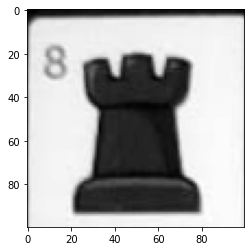

In [49]:
plt.imshow(boxes[0],cmap = 'gray')

In [50]:
boxes[0].shape

(100, 100)